In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
file_path = "C:/Users/thege/OneDrive/Escritorio/IH/Week 5,6P/data/raw/df_final_demo.txt"
df = pd.read_csv(file_path)
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [16]:
df.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [32]:
df['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

In [12]:
df.replace('X', np.nan,inplace = True)

In [13]:
df.isna().sum() 

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               17
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [14]:
df=df.dropna(how='all')

In [15]:
df.dropna(inplace=True) 

In [16]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [17]:
df= df.reset_index(drop=True)

In [45]:
df.to_csv('001_clients.csv', index=False)

In [15]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 20, 40, 60, df['clnt_age'].max()]
labels = ['-20', '20-40', '40-60', '+60']
df['clnt_age_category']= pd.cut(df['clnt_age'], bins=bins, labels=labels, include_lowest=True)

In [21]:
df.clnt_age_category.value_counts(sort=True)

clnt_age_category
40-60    28139
20-40    25475
+60      15501
-20       1479
Name: count, dtype: int64

In [17]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 5, 10, 15, df['clnt_tenure_yr'].max()]
labels = ['-5', '5-10', '10-15', '+15']
df['clnt_tenure_yr_category']= pd.cut(df['clnt_tenure_yr'], bins=bins, labels=labels, include_lowest=True)

In [20]:
df.clnt_tenure_yr_category.value_counts(sort=True)

clnt_tenure_yr_category
5-10     22224
10-15    18368
+15      17831
-5       12172
Name: count, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

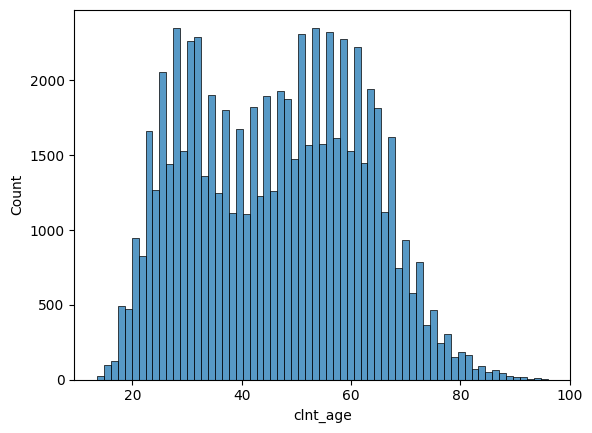

In [18]:
sns.histplot(data=df, x='clnt_age')

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

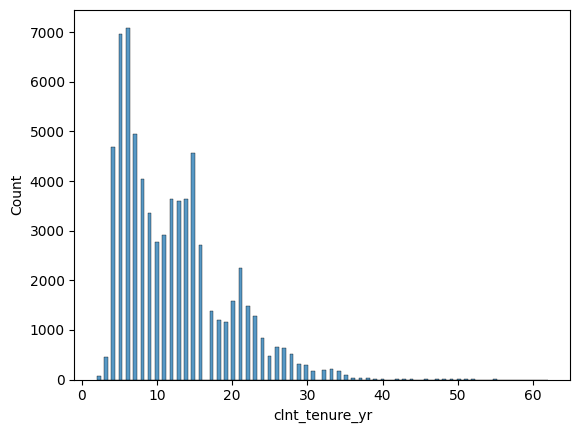

In [8]:
sns.histplot(data=df, x='clnt_tenure_yr')

<Axes: xlabel='calls_6_mnth', ylabel='Count'>

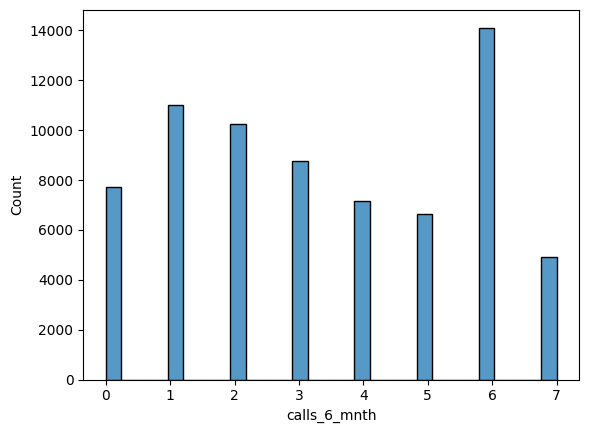

In [19]:
sns.histplot(data=df, x='calls_6_mnth')

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

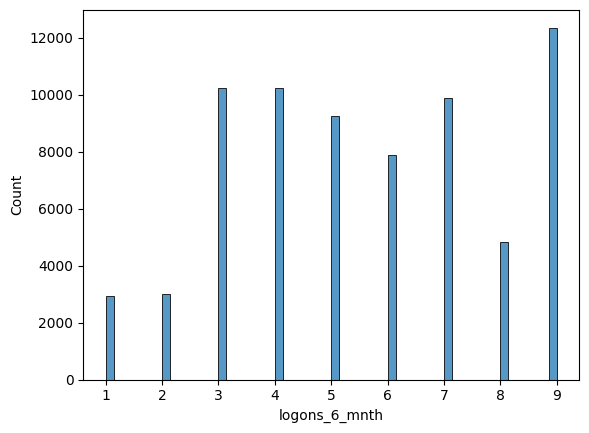

In [20]:
sns.histplot(data=df, x='logons_6_mnth')

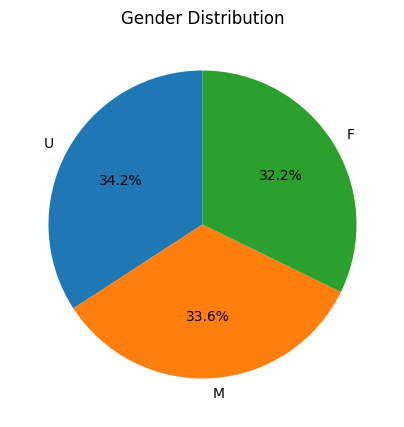

In [25]:
# Calculate the counts for each gender
gender_counts = df['gendr'].value_counts()
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

In [6]:
df.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object